The previous scripts fascilitated the creation of the DOE of simulation files and compiling all of the results. From this were 3 different CSV files. 

Log_Diagnostic.csv - Data points that are extracted from the simulation log file. 
Failure_Diagnostic.csv - Data from the results of the simulation
Test_Cases.csv - Strains applied to the model

The following analysis will explore the data from the simulations. The goal is to gain insight into the general convergence properties of the numerical model.

First, import the data into a pandas data frame. 

In [1]:
import pandas as pd
import numpy as np
Log = pd.read_csv("Log_Diagnostic.csv")
Fail = pd.read_csv("Failure_Diagnostic.csv")
Strain = pd.read_csv("Test_Cases.csv")

In [2]:
Log.head()

,Unnamed: 0,Time,Memory,Avg_Iterations_perTS,Completed,Still Running,Plastic Conv. Err,Conv. Iter. Err,Conv. Err
0,0,43165,255028,9.898089,False,False,False,True,0.0163917
1,1,247,255092,13.492063,False,False,False,True,1.5041
2,2,4065,254716,12.500000,False,False,False,True,0.960652
3,3,3171,254252,21.571429,False,False,False,True,16.1671
4,4,2245,253320,19.333333,False,False,False,True,4.91486


In [3]:
Fail.head()

,Unnamed: 0,Failed S11,Failed S22,Failed S33,Failed S12,Failed S13,Failed S23,F11,F22,F33,F12,F13,F23,E11,E22,E33,E12,E13,E23
0,0,True,True,False,True,True,True,0.999943,0.221726,1.000000,0.313227,0.393720,0.556419,0.01575,0.01575,0.000472,0.01575,0.000472,0.000472
1,1,True,True,False,True,True,True,0.998893,0.205587,1.000000,0.160935,0.350781,0.416963,0.01600,0.01600,0.000480,0.01600,0.000480,0.000480
2,2,False,True,True,False,True,True,1.000000,0.128643,0.794225,1.000000,0.988369,0.163186,0.00950,0.00950,0.000285,0.00950,0.000285,0.000285
3,3,True,True,True,True,False,True,0.012024,0.182259,0.641348,0.318493,1.000000,0.081013,0.02000,0.02000,0.000600,0.02000,0.000600,0.000600
4,4,False,True,True,True,True,True,1.000000,0.101656,0.711523,-1.039426,-0.535740,0.315123,0.02000,0.02000,0.000600,0.02000,0.000600,0.000600


In [4]:
Strain.head()

,# Stain 11,Strain 22,Strain 33,Strain 12,Strain 13,Strain 23,Time Step,Stain 11 per TS,Strain 22 per TS,Strain 33 per TS,Strain 12 per TS,Strain 13 per TS,Strain 23 per TS,14,5
0,0.05,0.05,0.0015,0.05,0.0015,0.0015,0.001,0.00005,0.00005,0.000002,0.00005,0.000002,0.000002,NaN,NaN
1,0.05,0.05,0.0015,0.05,0.0015,0.0015,0.005,0.00025,0.00025,0.000008,0.00025,0.000008,0.000008,NaN,NaN
2,0.05,0.05,0.0015,0.05,0.0015,0.0015,0.010,0.00050,0.00050,0.000015,0.00050,0.000015,0.000015,NaN,NaN
3,0.05,0.05,0.0015,0.05,0.0015,0.0015,0.050,0.00250,0.00250,0.000075,0.00250,0.000075,0.000075,NaN,NaN
4,0.05,0.05,0.0015,0.05,0.0015,0.0015,0.100,0.00500,0.00500,0.000150,0.00500,0.000150,0.000150,NaN,NaN


First the baseline metrics of the runs will be computed. There are a couple different errors that can be thrown for an incomplete simulation. 

In [5]:
#Overall metrics of model
sample = len(Log)

#Percentage of Convergence issues
conv_score = sum(Log["Conv. Iter. Err"])/sample

#Percentage of Plasticity issues
plas_score = sum(Log["Plastic Conv. Err"])/sample

#Percentage of Completed VTs
comp_score = sum(Log["Completed"])/sample

#Sensitivity of time step to 
iter_score = sum(Log["Avg_Iterations_perTS"])/sample

print("Percentage of Unconverged Runs: %", 100*round(conv_score, 2))
print("Percentage of Plasticity Errors: %", 100*round(plas_score, 2))
print("Percentage of Completed Runs: %", 100*round(comp_score, 2))
print("Avergae Iterations Per Time Step:", round(iter_score, 2))

Percentage of Unconverged Runs: % 51.0
Percentage of Plasticity Errors: % 0.0
Percentage of Completed Runs: % 49.0
Avergae Iterations Per Time Step: 11.52


Less than half of the simulations finished, with all of the incomplete runs encountering a convergence issue. 11 time steps per iteration is higher than what would be ideal.

Next, of non-converged runs, what are the average metrics regarding failure status.

In [6]:
# Look at final strain at point of convergence issue
E11 = np.mean(Fail[Log["Conv. Iter. Err"]]["E11"]*100)
E22 = np.mean(Fail[Log["Conv. Iter. Err"]]["E22"]*100)
E12 = np.mean(Fail[Log["Conv. Iter. Err"]]["E12"]*100)

#Standard error
S11 = np.std(Fail[Log["Conv. Iter. Err"]]["E11"]*100)/np.sqrt(len(Fail[Log["Conv. Iter. Err"]]["E11"]))
S22 = np.std(Fail[Log["Conv. Iter. Err"]]["E22"]*100)/np.sqrt(len(Fail[Log["Conv. Iter. Err"]]["E22"]))
S12 = np.std(Fail[Log["Conv. Iter. Err"]]["E12"]*100)/np.sqrt(len(Fail[Log["Conv. Iter. Err"]]["E12"]))

print("Strain at non-convergence point - E11: %", round(E11, 4), "err: %",round(S11, 5))
print("Strain at non-convergence point - E22: %", round(E22, 4), "err: %",round(S22, 5))
print("Strain at non-convergence point - E12: %", round(E12, 4), "err: %",round(S12, 5))

Strain at non-convergence point - E11: % 1.2492 err: % 0.13439
Strain at non-convergence point - E22: % 0.7344 err: % 0.1158
Strain at non-convergence point - E12: % 0.6899 err: % 0.11432


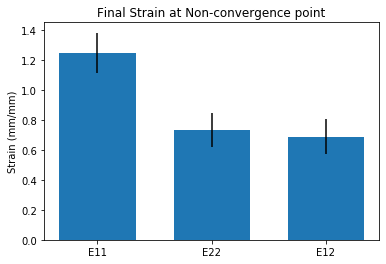

In [8]:
from matplotlib import pyplot as plt

plt.bar([0.8, 1.4, 2], [E11, E22, E12], 0.4, yerr=[S11, S22, S12], tick_label=["E11", "E22", "E12"])
plt.ylabel("Strain (mm/mm)")
plt.title("Final Strain at Non-convergence point")
plt.show()

In [9]:
# Percentage of non-failed situations for reach component at convergence issue
F11 = sum(Fail[Log["Conv. Iter. Err"]]["Failed S11"])/len(Fail[Log["Conv. Iter. Err"]]["Failed S11"])
F22 = sum(Fail[Log["Conv. Iter. Err"]]["Failed S22"])/len(Fail[Log["Conv. Iter. Err"]]["Failed S22"])
F12 = sum(Fail[Log["Conv. Iter. Err"]]["Failed S12"])/len(Fail[Log["Conv. Iter. Err"]]["Failed S12"])

print("F11 Failed: %", round((1-F11)*100))
print("F22 Failed: %", round((1-F22)*100))
print("F12 Failed: %", round((1-F12)*100))

F11 Failed: % 25
F22 Failed: % 0
F12 Failed: % 6


In [10]:
# Percentage of non-failed models but also incluse the siutations where the model barely fails (using 95% as the criteria)
P11 = sum(Fail[Log["Conv. Iter. Err"]]["F11"] > 0.95)/len(Fail[Log["Conv. Iter. Err"]]["F11"])
P22 = sum(Fail[Log["Conv. Iter. Err"]]["F22"] > 0.95)/len(Fail[Log["Conv. Iter. Err"]]["F22"])
P12 = sum(Fail[Log["Conv. Iter. Err"]]["F12"] > 0.95)/len(Fail[Log["Conv. Iter. Err"]]["F12"])

print("P11 Failed: %", round(P11*100))
print("P22 Failed: %", round(P22*100))
print("P12 Failed: %", round(P12*100))

P11 Failed: % 72
P22 Failed: % 0
P12 Failed: % 8


The purpose of these data points are to gain more insight into any component of the model that may be problematic regarding convergence. If a model "fails" in a component, we can conclude that particular compenent is robust for failure analysis. However, if, of the unconverged data points, the component never "fails" it could be problematic. 

We see for the initial observation of failure analysis, that 25% of the 11 component are not failed. This does not seem like much, so I went further to see if the model "barely fails." This shows a hit rate of 72% for the 11 component. This makes a much more convining argument that the 11 component is the problematic component considering convergence. 

Now that we have performed some initial observations on convergence rates and failure analyses, it is time to get into more rigorous exploration of the data with respect to the test cases applied. The main point of this study is to predict if there will be problems with the model for simulation prior to it's launch. This will be dependent on the strain rate applied to the model. 

A good place to start is "time step" and "iterations per time step." Without going into too much detail, "time step" (TS) determines how many steps there are for a simulation. A smaller TS generally leads to better convergence, but at the cost of run time. "Iterations per time step" is the number of attempts the simulation takes before converging. The more iterations, the tougher the time step was at converging.

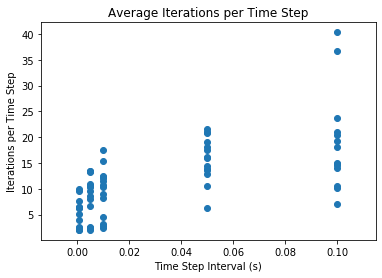

In [11]:
#Time step size vs. iterations per time step
x = Strain["Time Step"]
y = Log["Avg_Iterations_perTS"]

plt.scatter(x, y)
plt.xlabel("Time Step Interval (s)")
plt.ylabel("Iterations per Time Step")
plt.title("Average Iterations per Time Step")
plt.show()

R^2: 0.43


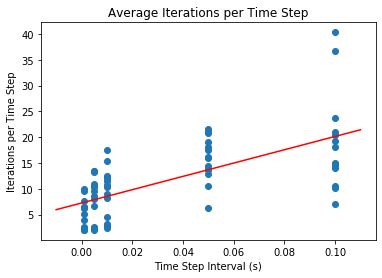

In [12]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
R2 = lg.score(x.values.reshape(-1,1), y.values.reshape(-1,1))
print("R^2:", round(R2, 3))

plt.scatter(x, y)
plt.plot(np.array([-0.01,0.11]).reshape(-1,1), lg.predict(np.array([-0.01,0.11]).reshape(-1,1)), c='r')
plt.xlabel("Time Step Interval (s)")
plt.ylabel("Iterations per Time Step")
plt.title("Average Iterations per Time Step")
plt.show()

It is obvious from the scatter plot, that a larger time step leads to more iterations. However, the R2 is pretty large from the simple linear regression. What this tells us is there must be a dependence on the components of applied strain (which is what we showed above). 

In the "Strain" dataframe, there are both the total strains applied and strain per TS applied to each component. I will start out observing the strain per TS, but eventually observe the total applied strain. 

Text(0, 0.5, 'Strain Componenet')

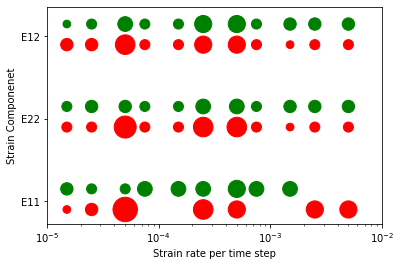

In [13]:
#Observe the different strain rates to see if there is a clear factor that contributes to convergence isues 
tmp = np.ones(70)
yes = Log["Conv. Iter. Err"]
no = ~Log["Conv. Iter. Err"]

#Seperate the converged and non-converged runs
y11 = Strain["Stain 11 per TS"][yes].value_counts()
n11 = Strain["Stain 11 per TS"][no].value_counts()
y22 = Strain["Strain 22 per TS"][yes].value_counts()
n22 = Strain["Strain 22 per TS"][no].value_counts()
y12 = Strain["Strain 12 per TS"][yes].value_counts()
n12 = Strain["Strain 12 per TS"][no].value_counts()

#Made variables to help control the plotting variables
d = 0.25
a = 2.5
m = 2
p = 2.1

#Here I tried to be creative in plotting the different points
#The larger the dot, the higher frequency of points for that value. 
#Green is "converged" and red is "non-converged"
#Also made log scale due to the spread in values
plt.xscale('log')
plt.scatter(y11.index, np.ones(len(y11.index)), color='r', s=(np.power((y11.values+a)*m, p)))
plt.scatter(n11.index, np.ones(len(n11.index)) + d, color='g', s=(np.power((n11.values+a)*m, p)))
plt.scatter(y22.index, np.ones(len(y22.index))*2, color='r', s=(np.power((y22.values+a)*m, p)))
plt.scatter(n22.index, np.ones(len(n22.index))*2 + d, color='g', s=(np.power((n22.values+a)*m, p)))
plt.scatter(y12.index, np.ones(len(y12.index))*3, color='r', s=(np.power((y12.values+a)*m, p)))
plt.scatter(n12.index, np.ones(len(n12.index))*3 + d, color='g', s=(np.power((n12.values+a)*m, p)))
plt.xlim((0.00001,0.01))
plt.yticks([1.1, 2.1, 3.1],["E11", "E22","E12"])
plt.xlabel("Strain rate per time step")
plt.ylabel("Strain Componenet")

What this plot is showing is if there are any clear determinates for the convergence issues. Since the point sizes are rather distributed, we see that the parameters are coupled. However, we do see that having a large E11 strain rate leads to non-convergence.

Text(0, 0.5, 'Strain Componenet')

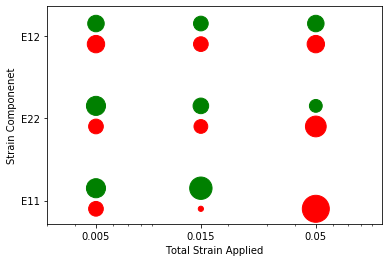

In [14]:
#Observe the different end strains to see if there is a clear factor that contributes to non-convergence
tmp = np.ones(70)
yes = Log["Conv. Iter. Err"]
no = ~Log["Conv. Iter. Err"]

y11 = Strain["# Stain 11"][yes].value_counts()
n11 = Strain["# Stain 11"][no].value_counts()
y22 = Strain["Strain 22"][yes].value_counts()
n22 = Strain["Strain 22"][no].value_counts()
y12 = Strain["Strain 12"][yes].value_counts()
n12 = Strain["Strain 12"][no].value_counts()

d = 0.25
a = 2
m = 3
p = 1.5
plt.xscale('log')
plt.scatter(y11.index, np.ones(len(y11.index)), color='r', s=(np.power((y11.values+a)*m, p)))
plt.scatter(n11.index, np.ones(len(n11.index)) + d, color='g', s=(np.power((n11.values+a)*m, p)))
plt.scatter(y22.index, np.ones(len(y22.index))*2, color='r', s=(np.power((y22.values+a)*m, p)))
plt.scatter(n22.index, np.ones(len(n22.index))*2 + d, color='g', s=(np.power((n22.values+a)*m, p)))
plt.scatter(y12.index, np.ones(len(y12.index))*3, color='r', s=(np.power((y12.values+a)*m, p)))
plt.scatter(n12.index, np.ones(len(n12.index))*3 + d, color='g', s=(np.power((n12.values+a)*m, p)))
plt.yticks([1.1, 2.1, 3.1],["E11", "E22","E12"])
plt.xlim((0.003,0.1))
plt.xticks([0.005, 0.015, 0.05],["0.005", "0.015","0.05"])
plt.xlabel("Total Strain Applied")
plt.ylabel("Strain Componenet")

Again, the values are spread. However, wee see that all tests with an E11 of 0.05 leads to non-convergence.

The next step is to build a classification model to predict if a test will converge or not. First, we will visualize the data in a 3D plot with the 3 factors shown above. 

Text(0.5, 0, 'Strain 12')

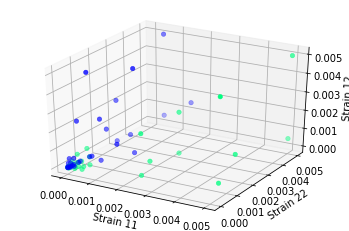

In [15]:
#3D Plot to visualize parameter correlations
import mpl_toolkits
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

x = Strain["Stain 11 per TS"]
y = Strain["Strain 22 per TS"]
z = Strain["Strain 12 per TS"]
res = Log["Conv. Iter. Err"]

ax.scatter(x, y, z, c=res, cmap='winter', linewidth=0.5)
ax.set_xlabel("Strain 11")
ax.set_ylabel("Strain 22")
ax.set_zlabel("Strain 12")

Text(0.5, 0, 'Strain 12')

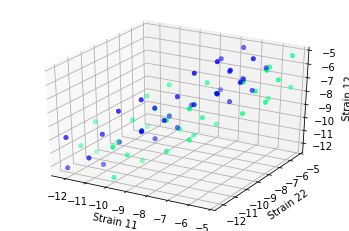

In [16]:
#Figure has values clumped at the lower strain values, will plot again but with log values
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.log(Strain["Stain 11 per TS"])
y = np.log(Strain["Strain 22 per TS"])
z = np.log(Strain["Strain 12 per TS"])
res = Log["Conv. Iter. Err"]

ax.scatter(x, y, z, c=res, cmap='winter', linewidth=0.5)
ax.set_xlabel("Strain 11")
ax.set_ylabel("Strain 22")
ax.set_zlabel("Strain 12")

There does seem to be a seperation when shown on a 3D plot. This makes the data a solid candidate for a classification model. In this test, I will use support vector machine to classify the data. I will use other methods like "k-nearest neighbor" in later projects. 

In [66]:
#Predictors will be from the "Strain" database
#Classifier will be the true or false from the Conv. Err. Iter. column in the Log file

#Linear Kernal
from sklearn.svm import SVC
from sklearn import preprocessing

#Important to scale the predictors
Strain_perTS = ["Stain 11 per TS", "Strain 22 per TS", "Strain 33 per TS", "Strain 12 per TS", "Strain 13 per TS", "Strain 23 per TS"]
Strain_perTS = Strain[Strain_perTS]
min_max_scaler = preprocessing.MinMaxScaler()
Strain_perTS = min_max_scaler.fit_transform(Strain_perTS)

#Iterate through different values of "C"
C=[0.0001, 0.01, 1, 10e2, 10e3]
r = []
for c in C:
    svc = SVC(kernel='linear', C=c)
    r.append(svc.fit(Strain_perTS, Log["Conv. Iter. Err"]).score(Strain_perTS, Log["Conv. Iter. Err"]))


Text(0, 0.5, 'Accuracy')

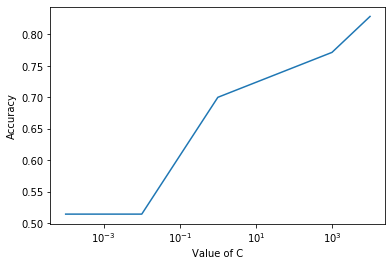

In [49]:
plt.xscale('log')
plt.plot(C, r)
plt.xlabel("Value of C")
plt.ylabel("Accuracy")

The accuracy shows how well the model fits the entire data. It is understood that this is not a great way to judge the expected accuracy of the model, since this is only fitting the given data, and is not validated against another set. I will do this later, but wanted to get an initial understanding if the data can be classified at all. It looks like it can, since we have an accuracy of over 80%. However, this could be from over-fitting. 

The next step is to use other kernals (polynomial and RBF).

In [50]:
C=[0.0001, 0.01, 1, 10e2, 10e3]
Deg=[1, 2, 3, 4]

for c in C:
    for d in Deg:
        svc = SVC(kernel='poly', C=c, degree=d, gamma=10)
        s = svc.fit(Strain_perTS, Log["Conv. Iter. Err"]).score(Strain_perTS, Log["Conv. Iter. Err"])
        r.append(s)

#I will use the same values for gamma as I did for C
for g in C:
    svc = SVC(kernel='rbf', gamma=g)
    s = svc.fit(Strain_perTS, Log["Conv. Iter. Err"]).score(Strain_perTS, Log["Conv. Iter. Err"])
    r.append(s)


In [54]:
r = np.array(r)
r = r.reshape(len(Deg)+2,len(C))
Index= ['Linear', 'Deg. 1', 'Deg. 2', 'Deg. 3', 'Deg. 4', 'RBF']
Cols = ['C or g =0.0001', 'C or g=0.01', 'C or g=1', 'C og g=10e2', 'C or g=10e3']
R = pd.DataFrame(data = r, index=Index, columns=Cols)

R.style.background_gradient('Blues')

,C or g =0.0001,C or g=0.01,C or g=1,C og g=10e2,C or g=10e3
Linear,0.514286,0.514286,0.7,0.771429,0.828571
Deg. 1,0.514286,0.514286,0.642857,0.714286,0.6
Deg. 2,0.742857,0.742857,0.742857,0.742857,0.742857
Deg. 3,0.757143,0.757143,0.828571,0.785714,0.785714
Deg. 4,0.785714,0.828571,0.871429,0.842857,0.842857
RBF,0.514286,0.514286,0.742857,0.885714,0.985714


The plot here follows what is generally seen with these models. Models of higher orders and complexity fit the data the best, but are subject to over fitting. What we can deduce from this is that even though the 4th degree polynomial shows the highest accuracy, we can get close to it in accuracy using just a linear kernal. Rule of thumb here, whenever we can have a simpler model, we go with it. 

However, let's see how these model compare for a cross validation study (this will take longer to run since we now have training sets per model).

In [56]:
from sklearn.model_selection import cross_val_score

r=[]
for c in C:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, Strain_perTS, Log["Conv. Iter. Err"], cv=5)
    scores = scores.mean()
    r.append(scores)

for c in C:
    for d in Deg:
        svc = SVC(kernel='poly', C=c, degree=d, gamma=10)
        scores = cross_val_score(svc, Strain_perTS, Log["Conv. Iter. Err"], cv=5)
        scores = scores.mean()
        r.append(scores)

for g in C:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, Strain_perTS, Log["Conv. Iter. Err"], cv=5)
    scores = scores.mean()
    r.append(scores)


In [58]:
r = np.array(r)
r = r.reshape(len(Deg)+2,len(C))
R = pd.DataFrame(data = r, index=Index, columns=Cols)
R.style.background_gradient(cmap='Blues')

,C or g =0.0001,C or g=0.01,C or g=1,C og g=10e2,C or g=10e3
Linear,0.514359,0.514359,0.698462,0.712747,0.712747
Deg. 1,0.514359,0.514359,0.643223,0.685128,0.600366
Deg. 2,0.670842,0.741319,0.698462,0.741319,0.712747
Deg. 3,0.656557,0.643223,0.712747,0.501319,0.527692
Deg. 4,0.556264,0.712747,0.474359,0.501978,0.488645
RBF,0.514359,0.514359,0.741319,0.569597,0.570549


As expected, the accuracy is lower for a 5 fold cross-validation. However, the results are still pretty good. The kernel that saw the lowest reduction in accuracy was the 2nd degree polynomial. Although this is good, I still believe it is best to move forward with the linear kernal. 

In [59]:
svc = SVC(kernel='linear', C=2)
scores = cross_val_score(svc, Strain_perTS, Log["Conv. Iter. Err"], cv=5)
score = scores.mean()
score

0.7413186813186814

Using this data, we can expect 75% accuracy in deciding if the model will converge. This isn't great, but I believe there are a few explanations here. 

1) 70 data points is not a lot for 6 factors - we could use more data points
2) 6 factors for 70 data points is a lot - we could use some techniques to reduce the number of factors or reduce the influence on these factors (forward selection, elastic net, lasso, etc)
3) We did not do any outlier analysis - even though this is FEA, there is some randomness when it comes to non-convergence error. We could possibly perform a correlation to this error and the results deviance from the model.

I will end this study here even though we can go into much more detail and analysis. The last thing I will do is see if this model works better with the data I used, or the other data set that uses on total applied strain and time step. 

In [69]:
Total_Strain = ["# Stain 11", "Strain 22", "Strain 33", "Strain 12", "Strain 13", "Strain 23", "Time Step"]
Total_Strain = Strain[Total_Strain]
min_max_scaler = preprocessing.MinMaxScaler()
Total_Strain = min_max_scaler.fit_transform(Total_Strain)
C=[0.0001, 0.01, 1, 10e2, 10e3]

r = []
for c in C:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, Total_Strain, Log["Conv. Iter. Err"], cv=5)
    score = scores.mean()
    r.append(score)


In [70]:
r

[0.5143589743589743,
 0.5143589743589743,
 0.7821245421245422,
 0.7708424908424908,
 0.7708424908424908]

Well, this it is obvious it is actually better to use the total strain values and the time step size to predict the convergence of the model. However, like what was stated above, there are some issues that can be worked through. 